<a href="https://colab.research.google.com/github/bintangnabiil/Machine_Learning/blob/main/Machine_Learning_Clusteringweek06_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Buat Model Clustering K-Means dan Agglomerative

##1. Import Library dan Load Data


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/clusteringweek06.csv')

##2. Standarisasi fitur

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

##3. K-Means Clustering

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Misal jumlah cluster = 3
kmeans_labels = kmeans.fit_predict(X_scaled)

##4. Agglomerative Clustering

In [6]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

##5. Visualisasi Menggunakan PCA

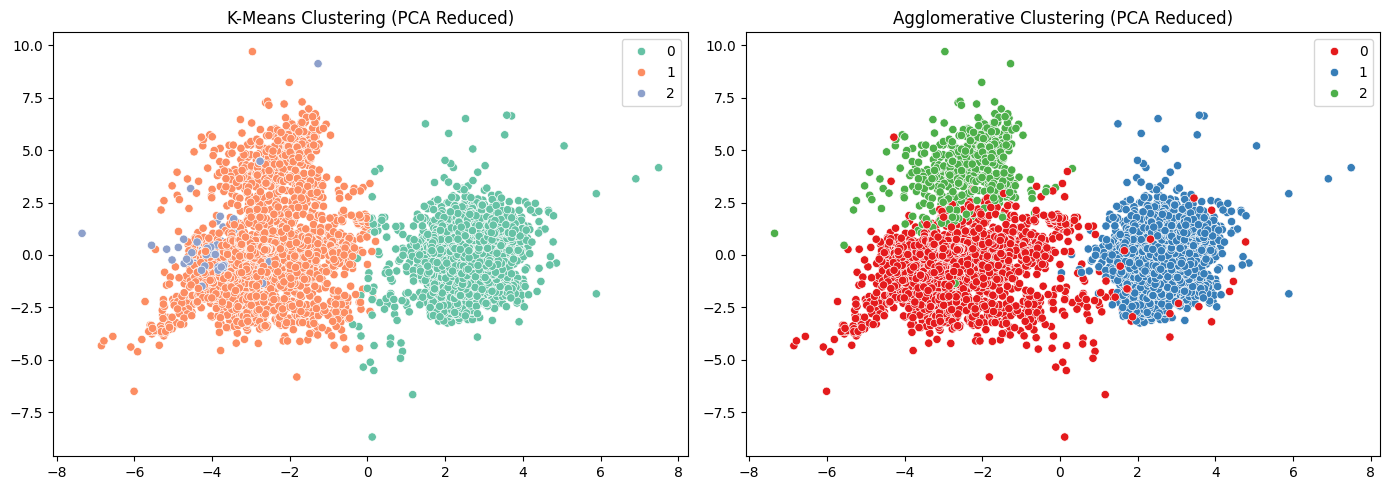

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='Set2')
plt.title("K-Means Clustering (PCA Reduced)")

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=agglo_labels, palette='Set1')
plt.title("Agglomerative Clustering (PCA Reduced)")

plt.tight_layout()
plt.show()

#2) Evaluasi Matriks

##1. Elbow, Silhouette, Calinski_Harabasz, Davies Bouldin

In [10]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
import numpy as np

# Standarisasi ulang untuk jaga-jaga
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df)

# Simpan skor untuk evaluasi berbagai jumlah cluster
elbow_inertia = []
silhouette_scores = []
ch_scores = []
db_scores = []

cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)

    elbow_inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))

# Gabungkan ke dalam dataframe agar mudah dilihat
score_df = pd.DataFrame({
    'n_clusters': list(cluster_range),
    'Elbow_Inertia': elbow_inertia,
    'Silhouette': silhouette_scores,
    'Calinski_Harabasz': ch_scores,
    'Davies_Bouldin': db_scores
})

score_df

,n_clusters,Elbow_Inertia,Silhouette,Calinski_Harabasz,Davies_Bouldin
0,2,108667.951258,0.329799,3284.605925,1.308099
1,3,98299.481793,0.333652,2194.578237,1.265539
2,4,86674.222362,0.347980,1980.554475,1.424032
3,5,75684.095971,0.354285,1961.893190,1.347381
4,6,71977.746054,0.341148,1724.140662,1.496576
5,7,63826.155549,0.273265,1773.061289,1.573623
6,8,59928.473725,0.262328,1685.161959,1.498100
7,9,57392.002145,0.262283,1579.170151,1.435096
8,10,52438.360582,0.279716,1611.509887,1.301783


##2. Dunn Index

In [11]:
from scipy.spatial.distance import cdist
import numpy as np

def dunn_index(X, labels):
    unique_cluster = np.unique(labels)
    n_clusters = len(unique_cluster)

    distances = cdist(X, X)
    intra_dists = []
    for k in unique_cluster:
        cluster_points = X[labels == k]
        if len(cluster_points) > 1:
            intra = np.max(cdist(cluster_points, cluster_points))
        else:
            intra = 0
        intra_dists.append(intra)

    max_diameter = np.max(intra_dists)

    inter_dists = []
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            points_i = X[labels == unique_cluster[i]]
            points_j = X[labels == unique_cluster[j]]
            dist_ij = np.min(cdist(points_i, points_j))
            inter_dists.append(dist_ij)

    min_intercluster = np.min(inter_dists)

    if max_diameter == 0:
        return np.nan
    return min_intercluster / max_diameter

In [12]:
from sklearn.cluster import KMeans

dunn_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    dunn = dunn_index(X_scaled, labels)
    dunn_scores.append(dunn)

# Tampilkan hasil Dunn Index per jumlah cluster
for k, score in zip(range(2, 11), dunn_scores):
    print(f"Dunn Index for k={k}: {score}")

Dunn Index for k=2: 0.015535679796406887
Dunn Index for k=3: 0.01923706072255211
Dunn Index for k=4: 0.01923706072255211
Dunn Index for k=5: 0.018140181866836632
Dunn Index for k=6: 0.026396349659729753
Dunn Index for k=7: 0.026396349659729753
Dunn Index for k=8: 0.027526433218725947
Dunn Index for k=9: 0.03416899504567227
Dunn Index for k=10: 0.025750445970825132


##3. Penjelasan dan Interpretasi
- Elbow (Inertia): Semakin kecil nilainya, semakin baik — namun kita cari “elbow” atau titik belokan. Tampaknya ada belokan di sekitar 3–5 cluster.
-Silhouette Score: Semakin besar (mendekati 1) semakin baik. Skor tertinggi terjadi pada n_clusters=9 (0.286).
- Calinski-Harabasz Index: Semakin besar, semakin baik. Nilainya terus naik, tertinggi pada n_clusters=10.
- Semakin kecil, semakin baik. Terendah pada n_clusters=10.

##4. Matriks terbaik
- Calinski-Harabasz dan Davies-Bouldin cukup kuat karena mempertimbangkan intra-cluster compactness dan inter-cluster separation.
- Namun, Silhouette Score paling umum dan interpretatif. Dalam hal ini, n_clusters=9 memiliki skor tertinggi secara umum (Silhouette & DB Index juga rendah).

#3) Penjelasan Persamaan Matematika
##1. K-Means Clustering
Tujuan K-Means adalah meminimalkan total jarak kuadrat antara setiap titik dan pusat cluster-nya:
$$
J = \sum_{i=1}^k\sum_{x\in C_i} ||x-μ_i||^2
$$

Keterangan:
- $k$ = jumlah cluster
- $C_i$ = himpunan titik pada cluster ke-$i$
- $μ_i$ = pusat (centroid) dari cluster ke-$i$
- $||x-μ_i||^2$ = jarak kuadrat antara titik $x$ dan centroid-nya<br><br>

##2. Agglomerative Clustering
Metode Hierarchical Clustering ini tidak memiliki satu rumus cost function seperti K-Means. Namun, ide utamanya adalah:
- Awalnya setiap titik adalah 1 cluster
- Gabungkan dua cluster terdekat berdasarkan linkage:

Linkage paling umum digunakan:
- Single Lingkage
$$
D(C_i, C_j) = \underset {\text{x ∈ C_i,y ∈ C_j}}{\text{min}} ||x-y||
$$
- Complete Lingkage
$$
D(C_i, C_j) = \underset {\text{x ∈ C_i,y ∈ C_j}}{\text{max}} ||x-y||
$$
- Average Linkage
$$
D(C_i, C_j) = \frac{1}{|C_i||C_j|} \sum_{x \in C_i} \sum_{y \in C_j} ||x-y||
$$<br><br>

##3. Inertia / Elbow Method
Tujuannya adalah mencari titik "tekukan" (elbow) saat penambahan cluster tidak menurunkan inertia secara signifikan.
$$
Inertia = \sum_{i=1}^n ||x_i - μ_{c(i)}||^2
$$

Keterangan:
- $x_i$ = titik data ke-$i$
- $μ_{c(i)}$ = centroid dari cluster tempat x_i berada<br><br>

##4. Silhoutte Coefficient
Untuk setiap titik-$i$:
$$
s(i) = \frac{c(i) - a(i)}{max(a(i)), b(i)}
$$

Keterangan:
- $a(i)$ = rata-rata jarak antara $i$ dan semua titik dalam cluster yang sama
- $b(i)$ = jarak terkecil rata-rata dari $i$ ke semua cluster lain
- Nilai $s(i) ]in [-1, 1]$:
  - Dekat dengan 1: sangat cocok dalam clusternya
  - Dekat 0: dekat perbatasan antara dua cluster
  - Negatif: kemungkinan salah cluster<br><br>

##5. Calinski-Harabasz Index
$$
CH = \frac{Tr(B_k)}{Tr(W_k)} \cdot \frac{n-k}{k-1}
$$

Keterangan:
- $TR(B_k)$ = antara-class dispersion (variasi antar cluster)
- $Tr(W_k)$ = within-class dispersion (variasi dalam cluster)
- $n$ = jumlah total data
- $k$ = jumlah cluster

Semakin besar CH Index, semakin bagus pemisahan cluster-nya.<br><br>

##6. Davies-Bouldin Index
$$
DB = \frac{1}{k} \sum_{i=1}^k \underset{j \not= 1}{max} (\frac{\sigma_i + \sigma_j}{d_{ij}})
$$

Keterangan:
- $\sigma_i$ = rata-rata jarak titik dalam cluster $i$ ke centroid-nya
- $d_{ij}$ = jarak antara centroid cluster $i$ dan $j$

Semakin kecil DB Index, semakin baik karena cluster lebih jauh dan lebih rapat.<br><br>

##7. Dunn Index
$$
D = \frac{min_{i \not= j} d(C_i,C_j)}{max_x δ(C_k)}
$$

Keterangan:
- $d(C_i,C_j)$ = jarak minimum antar dua cluster berbeda
- $δ(C_k)$ = diameter maksimum dari cluster $C_k$ (jarak terbesar antara dua titik dalam cluster)
- Semakin Tinggi nilai Dunn Index, semakin baik cluster karena:
  - antar-cluster jauh (besar numerator)
  - intra-cluster rapat (kecil denominator)